36.14457831325301
14.150943396226417
10.309278350515463
10.067114093959733
13.888888888888888
30.92783505154637
9.523809523809522
16.949152542372886
25.21008403361342
20.40816326530614
21.126760563380255
17.543859649122833
21.126760563380255
19.48051948051949
21.897810218978087
22.900763358778647
17.543859649122798
16.574585635359128
13.824884792626717
11.278195488721819
15.78947368421048
18.404907975460173
12.711864406779664
14.285714285714276
16.853932584269653
14.778325123152701
9.900990099009897
16.483516483516482
24.590163934426254
12.500000000000007
12.93103448275862
16.304347826086925
17.24137931034488
18.987341772151918
20.0
15.78947368421048
18.404907975460173
15.70680628272254
11.450381679389293
15.07537688442215
14.56310679611649
11.1111111111111
17.441860465116292
12.658227848101241
14.018691588785043
16.949152542372918
16.666666666666693
13.27433628318581
14.08450704225355
11.070110701106978
10.600706713780925
13.761467889908303
14.705882352941131
15.70680628272254
15.9574

/usr/local/lib/python3.4/dist-packages/scipy/signal/filter_design.py:346: RuntimeWarning: divide by zero encountered in true_divide
  h = polyval(b[::-1], zm1) / polyval(a[::-1], zm1)
/usr/local/lib/python3.4/dist-packages/scipy/signal/filter_design.py:346: RuntimeWarning: invalid value encountered in true_divide
  h = polyval(b[::-1], zm1) / polyval(a[::-1], zm1)
/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


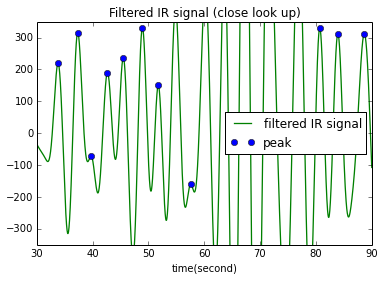

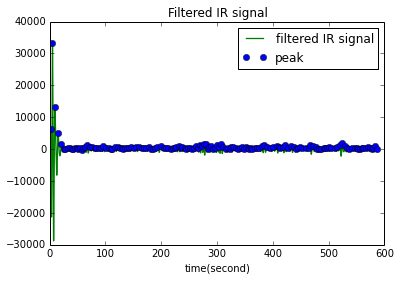

/usr/lib/python3/dist-packages/matplotlib/transforms.py:644: RuntimeWarning: invalid value encountered in sign
  dx0 = np.sign(vertices[:, 0] - x0)
/usr/lib/python3/dist-packages/matplotlib/transforms.py:646: RuntimeWarning: invalid value encountered in sign
  dx1 = np.sign(vertices[:, 0] - x1)


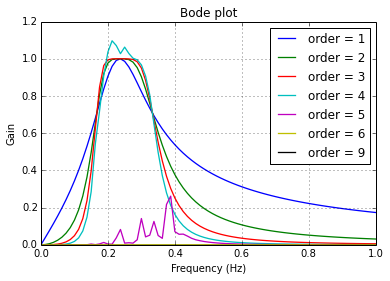

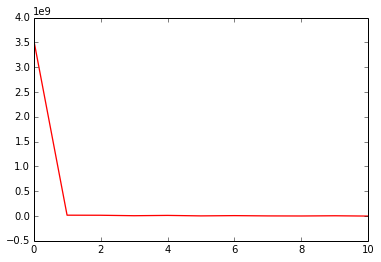

In [4]:
%matplotlib inline

from scipy.signal import butter, lfilter

# Creates and returns Butterworth bandpass filter by given cutoff frequencies, sampling rate, and order
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a

# Applies Butterworth bandpass filter to given data and returns filtered data
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Counts peaks of given dataset
def count_peaks(dataset):
    peak_num = 0
    peak_time = []
    peak_val = []
    for (num, data) in enumerate(dataset):
        if 1 < num < len(dataset)-1:
            if dataset[num-1] < data  and data > dataset[num+1]:
                peak_time.append(num*0.02)
                peak_val.append(data)
                peak_num += 1
    return peak_time, peak_val, peak_num

if __name__ == "__main__":
    from numpy import genfromtxt, fft, pi, sqrt
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    data = genfromtxt('../harshil_walk_assignment7_no_header.csv',delimiter=',') # Be sure to remove the header of "sample.csv" beforehands

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 50
    lowcut = 1/6
    highcut = 1/3
    
    # Extract sampling time and IR data from CSV file
    time = [row[0]*0.02 for row in data]
    IR = [row[1] for row in data]

    # Filter IR data
    Filtered_IR = butter_bandpass_filter(IR, lowcut, highcut, fs, order=4)
    
    # Find peak time, peak value and number of peaks in filtered data
    peak_time, peak_val, peak_num = count_peaks(Filtered_IR)
    
    respiration_rate = []
    f = open('respirationRate.csv', 'w+')
    for i, t in enumerate(peak_time):
        if i == 0:
            f.write(str(60/t) + '\n')
            print(60/t)
            respiration_rate.append(60/t)
        elif i < len(peak_time)-1:
            f.write(str(60/(peak_time[i+1]-t)) + '\n')
            print(60/(peak_time[i+1]-t))
            respiration_rate.append(60/(peak_time[i+1]-t))
    f.close()
    
    # Calculate and display resipration rate
    print('Average respiration rate: ', sum(respiration_rate)/float(len(respiration_rate)))
    
    # Display filtered data with peaks (closer look up to small signals)
    plt.figure(1)
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(peak_time, peak_val, 'o', label="peak")
    plt.title('Filtered IR signal (close look up)')
    plt.legend(loc='best')
    plt.xlim([30, 90])
    plt.ylim([-350, 350])
    
    # Display filtered data with peaks
    plt.figure(2)
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(peak_time, peak_val, 'o', label="peak")
    plt.legend(loc='best')
    plt.title('Filtered IR signal')
    
    # Display bandpass filter Bode plot
    plt.figure(3)
    for order in [1, 2, 3, 4, 5, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000) # freqz: Calculates frequency response of a given filter
        plt.plot((fs * 0.5 / pi) * w, abs(h), label="order = %d" % order, lw=1.3)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Bode plot')
    plt.xlim([0, 1])
    
    plt.figure(4)
    plt.plot(fft.fft(IR), 'r', lw=1.3)
    plt.xlim([0, 10])
    
    plt.show()